# Пример анализа данных
## Open Policing Project
### Датасет содержит информацию об остановках автомобилей полицией

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# загрузить данные в DataFrame
df = pd.read_csv('police.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [35]:
# проверить размеры датафрейма
len(df)

91741

In [36]:
# проверить типы данных в датафрейме
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [37]:
# проверить количество отсутствующих данных
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### 1. Удалить столбец, в котром отсутствуют данные

- Методы drop, dropna
- Обратить внимание на аргументы по-умолчанию
- Проверить результат

In [63]:
df.drop('county_name', axis='columns', inplace=True)

In [64]:
df.dropna(axis=1, how='all', inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


### 2. Кто чаще нарушает скоростной режим - женщины или мужчины?

- Столбцы: driver_gender, violation
- Разные способы ответить на вопрос

In [41]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

Ответ: Чаще скоростной режим нарушают мужичны

In [42]:
df[df['violation'] == 'Speeding'][df['driver_gender'] == 'F'].violation.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Speeding    15482
Name: violation, dtype: int64

In [ ]:
df[df['violation'] == 'Speeding'][df['driver_gender'] == 'M'].violation.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Speeding    19015
Name: violation, dtype: int64

### 3. Влияет ли пол водителя на проведение розыска во время остановки?

- Столбцы: driver_gender, search_conducted
- Трудно определить причинно-следственную связь, но можно выявить отношения
- Использовать все доступные факторы для выявления отношений

In [ ]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.976197
               True                0.023803
M              False               0.950601
               True                0.049399
Name: search_conducted, dtype: float64

Ответ: У мужчин обыск во время остановки проводят чаще, но отличия незначительны

### 4. Почему вид розыска (search_type) так часто отсутствует?

- Столбцы: driver_gender, search_conducted
- pandas во время расчетов по-умолчанию выбрасывает отсутствующие данные (Null, NA, NaN, False)
- Использовать все доступные факторы для выявления отношений

In [ ]:
#Если тип розыска не указан, значит что что розыска не было вообще
print(df[df.search_conducted == False].search_conducted.count())
print(df[df.search_conducted == False].search_type.count())

41313
0


Ответ: Если самого розыска не было, то и вид розыска не указывается

### 5. Как часто водителя обыскивают (Protective Frisk)?

- Столбцы: search_type
- строковые методы для поиска частичных совпадений

In [ ]:

probability = len(df[df['search_type'] == 'Protective Frisk'])/ df.search_type.count()
print('Вероятность обыска: ', probability)

Вероятность обыска:  0.06511627906976744


### 6. В каком году меньше всего полиция останавливала автомобили?

- Столбцы: stop_date, stop_time
- тип данных datetime и его методы

In [ ]:
df.stop_datetime.dt.year.value_counts().sort_values()

2005.0     2558
2010.0     3700
2009.0     7908
2008.0     8752
2007.0     9476
2006.0    10639
Name: stop_datetime, dtype: int64

Ответ: меньше всего останавливали в 2005 году

### 7. Как изменялось количество остановок, связанных с запрещенными веществами, в течение дня?

- Столбцы: stop_datetime, drug_related_stop
- groubby
- plot

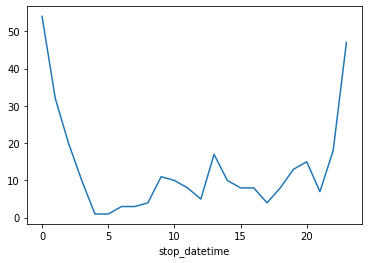

In [ ]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

### 8. Верно ли, что большинство остановок происходило ночью?

- Столбцы: stop_datetime
- groubby
- plot

In [44]:
night = df[(df['stop_time'] < '07:00')&(df['stop_time'] >= '00:00')]
print(len(night))
day = df[(df['stop_time'] <= '23:59')&(df['stop_time'] >= '07:00')]
print(len(day))

17564
74177


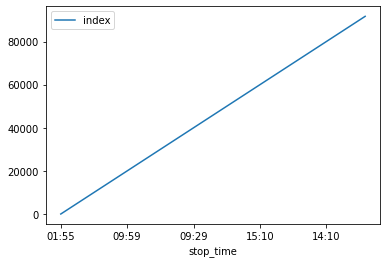

In [45]:
df.reset_index().plot(x = 'stop_time', y='index' )

Ответ: нет, большинство остановок происходило днем

### 9. Найти плохие данные в столбце stop_duration (длительность остановки) и исправить их.

- Столбцы: stop_datetime
- loc

In [46]:
df.stop_duration.value_counts()


0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [47]:
data1 = df.index[df['stop_duration']== '1'].tolist ()
data2 = df.index[df['stop_duration']== '2'].tolist ()
df.stop_duration.loc[data1] = "0-15 Min"
df.stop_duration.loc[data2] = "16-30 Min"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
df.stop_duration.value_counts()


0-15 Min     69544
16-30 Min    13636
30+ Min       3228
Name: stop_duration, dtype: int64

### 10. Каково среднее время остановки (stop_duration) для каждого нарушения (violation_raw)?

- Столбцы: stop_duration, violation_raw
- Преобразование строк в числа
- Важно не только среднее, но и количество

In [68]:
avg = {'0-15 Min': 7.5, '16-30 Min': 23, '30+ Min': 30}
df.dropna(axis='index', inplace=True)
kol = []
for x in df.stop_duration.values.tolist():
  kol.append(avg[x])
kol

[23,
 23,
 30,
 30,
 23,
 30,
 23,
 30,
 23,
 23,
 23,
 23,
 23,
 23,
 30,
 7.5,
 23,
 30,
 7.5,
 7.5,
 23,
 30,
 30,
 30,
 7.5,
 23,
 23,
 23,
 23,
 23,
 23,
 7.5,
 23,
 30,
 23,
 30,
 23,
 23,
 23,
 23,
 23,
 23,
 30,
 23,
 30,
 30,
 30,
 30,
 23,
 30,
 7.5,
 23,
 23,
 30,
 7.5,
 30,
 30,
 7.5,
 7.5,
 23,
 7.5,
 23,
 23,
 23,
 7.5,
 23,
 7.5,
 23,
 7.5,
 7.5,
 7.5,
 23,
 30,
 23,
 23,
 23,
 30,
 7.5,
 7.5,
 7.5,
 7.5,
 23,
 23,
 23,
 30,
 23,
 23,
 30,
 30,
 30,
 23,
 30,
 7.5,
 30,
 30,
 23,
 23,
 30,
 23,
 23,
 30,
 30,
 23,
 23,
 23,
 7.5,
 23,
 23,
 23,
 30,
 23,
 7.5,
 23,
 30,
 23,
 23,
 30,
 30,
 30,
 23,
 23,
 30,
 30,
 30,
 23,
 23,
 30,
 30,
 7.5,
 23,
 23,
 30,
 30,
 23,
 30,
 30,
 23,
 30,
 23,
 30,
 23,
 7.5,
 30,
 30,
 7.5,
 30,
 7.5,
 30,
 30,
 30,
 23,
 30,
 23,
 7.5,
 23,
 23,
 30,
 23,
 23,
 23,
 7.5,
 30,
 23,
 23,
 30,
 7.5,
 30,
 30,
 23,
 30,
 7.5,
 23,
 30,
 30,
 23,
 30,
 30,
 30,
 23,
 7.5,
 23,
 23,
 30,
 7.5,
 30,
 7.5,
 23,
 30,
 30,
 30,
 30,
 23,
 30,
 3

In [69]:
df.insert(14, 'avg_num', kol)

In [70]:
df.groupby('violation_raw').avg_num.mean()

violation_raw
APB                                 25.375000
Call for Service                    24.527523
Equipment/Inspection Violation      18.510653
Motorist Assist/Courtesy            23.178571
Other Traffic Violation             20.530168
Registration Violation              22.414414
Seatbelt Violation                  17.005208
Special Detail/Directed Patrol      21.519231
Speeding                            20.338389
Suspicious Person                   22.275000
Violation of City/Town Ordinance    17.633333
Warrant                             21.300000
Name: avg_num, dtype: float64

### 11. Визуализировать результаты пункта 10

- Не использовать plot для категориальных данных
- Сортировка и ориентация графика даст лучший результат

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

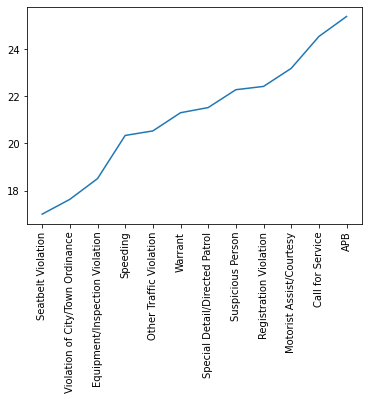

In [71]:
plt.plot(df.groupby('violation_raw').avg_num.mean().sort_values())
plt.xticks(rotation='vertical')

### 12. Рассчитать возрастное распределение для каждого нарушения

- Гистограммы (метод hist) - для визуализации распределений

In [72]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,704.0,29.444602,9.650643,16.0,22.0,26.0,35.0,70.0
Moving violation,895.0,32.229050,11.076915,15.0,23.0,29.0,40.0,79.0
Other,209.0,33.688995,12.185818,17.0,24.0,31.0,43.0,66.0
Registration/plates,333.0,31.414414,10.682269,16.0,23.0,29.0,37.0,73.0
Seat belt,96.0,29.958333,8.985271,18.0,24.0,27.0,32.0,54.0
Speeding,956.0,29.232218,9.270030,17.0,22.0,26.0,34.0,68.0


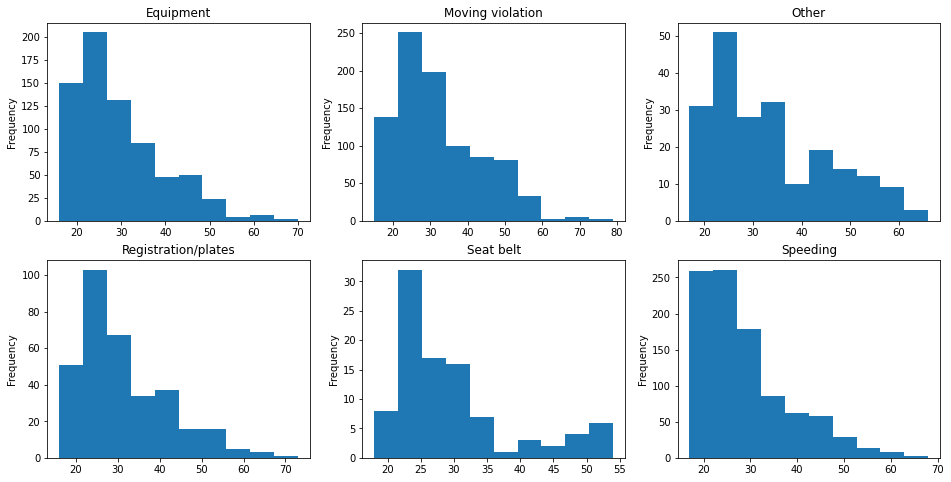

In [84]:
figures, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
df[df.violation == 'Speeding'].driver_age.plot(kind='hist', ax=ax[1,2], title='Speeding')
df[df.violation == 'Seat belt'].driver_age.plot(kind='hist', ax=ax[1,1], title='Seat belt')
df[df.violation == 'Registration/plates'].driver_age.plot(kind='hist', ax=ax[1,0], title='Registration/plates')
df[df.violation == 'Other'].driver_age.plot(kind='hist', ax=ax[0,2], title='Other')
df[df.violation == 'Equipment'].driver_age.plot(kind='hist', ax=ax[0,0], title='Equipment')
df[df.violation == 'Moving violation'].driver_age.plot(kind='hist', ax=ax[0,1], title='Moving violation')

### 13. Представьте, что столбца возраст водителя (driver_age) нет. Создать аналогичный столбец на основе года рождения (driver_age_raw) и назвать его (driver_age_new).

- head и tail могут быть не репрезентативны
- даже если в столбце данные частично отсутствуют, оставшиеся могут быть не корректными
- гистограммы - хороший способ проверить корректность выполненных преобразований

In [93]:
driver_age_new = []
for age in df.driver_age_raw.values.tolist():
    if (age < 2022) and (age > 1920):
        driver_age_new.append(2022-age)
df.insert(5, 'driver_age_new', driver_age_new)

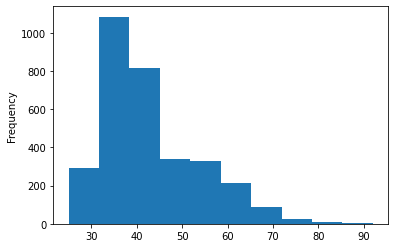

In [94]:
df.driver_age_new.plot(kind='hist')